## <b>Understanding Feedforward Neural Network</b>

In this lab, you are required to build 3 Feedforward Neural Networks to simulate function
<br> $y = xsin( \frac {x^2} {300})$
<br> in range x: +-100
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 2.

<br><b>For submission, submit a link to your github repo</b>
<br>All student in the group must submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> Generate a decent amount of training data in the interval of x.
<br>
<br> Since we are only approximating a function, data can be generated by plug in x value and get corresponding y value.
<br>You may use the way to generate data as in file Introduction_to_Artificial_Neural_Network.ipynb ([np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html))
<br>
<br>All data need to be separated by the same distance.
<br>Ex:if you select an intervel from -100 to +100, and a total of 10001 data points, each x coordinate should be separated by 0.02


In [ ]:
import numpy as np

# Define interval and total data points
x_min = -200
x_max = 200
data_points = 10001

# Generate x values
x_values = np.linspace(x_min, x_max, data_points)

# Calculate y values using y = xsin(x^2/300)
y_values = x_values * np.sin((x_values**2) / 300)

# Check values
print("x values: ", x_values[:10])
print("y values: ", y_values[:10])

x values:  [-200.   -199.96 -199.92 -199.88 -199.84 -199.8  -199.76 -199.72 -199.68
 -199.64]
y values:  [-196.61095871 -194.33837553 -191.51486501 -188.14899973 -184.25088089
 -179.83210686 -174.90573757 -169.48625479 -163.58951852 -157.23271951]


#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>
<br> You may use the model built in file Introduction_to_Artificial_Neural_Network.ipynb and change number of layers, number of neurons in each layer, activation function, loss function (loss), batch size, and/or epochs of the model. Or you can build your own model from scratch.
<br>
<br>Observe the change in training process (training time, accuracy changing rate) and final results when you change the parameters.
<br>
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test. You may do this with sklearn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or keras' [validation_split](https://keras.io/api/models/model_training_apis/#fit-method) parameter in fit method together with train_test_split().

In [ ]:
# model 1
# Using example from notes
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split

x_train = x_values
y_train = y_values

# Split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values,
                                                    test_size=0.6, random_state=42)
model_1 = Sequential()
model_1.add(Input(shape=(1,)))
model_1.add(Dense(150,activation = "relu"))
model_1.add(Dense(150,activation = "LeakyReLU"))
model_1.add(Dense(150,activation = "ThresholdedReLU"))
model_1.add(Dense(150,activation = "PReLU"))
model_1.add(Dense(150,activation = "ELU"))
model_1.add(Dense(150,activation = "relu"))
model_1.add(Dense(1))

model_1.compile(
   loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model_1.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_split=0.4)


Epoch 1/50
19/19 [==============================] - 2s 34ms/step - loss: 64.4494 - mae: 64.4494 - val_loss: 61.7769 - val_mae: 61.7769
Epoch 2/50
19/19 [==============================] - 0s 27ms/step - loss: 64.3182 - mae: 64.3182 - val_loss: 61.6831 - val_mae: 61.6831
Epoch 3/50
19/19 [==============================] - 0s 24ms/step - loss: 64.2178 - mae: 64.2178 - val_loss: 61.6585 - val_mae: 61.6585
Epoch 4/50
19/19 [==============================] - 1s 30ms/step - loss: 64.1761 - mae: 64.1761 - val_loss: 61.5083 - val_mae: 61.5083
Epoch 5/50
19/19 [==============================] - 1s 31ms/step - loss: 64.0882 - mae: 64.0882 - val_loss: 61.6143 - val_mae: 61.6143
Epoch 6/50
19/19 [==============================] - 0s 22ms/step - loss: 64.1315 - mae: 64.1315 - val_loss: 61.6215 - val_mae: 61.6215
Epoch 7/50
19/19 [==============================] - 0s 18ms/step - loss: 64.2100 - mae: 64.2100 - val_loss: 61.7015 - val_mae: 61.7015
Epoch 8/50
19/19 [==============================] - 0s 

In [ ]:
# model 2
model_2 = Sequential([
    Dense(64, activation = 'relu', input_shape=(1,)),
    Dense(64, activation = 'relu'),
    Dense(1)
])

# Compile model
model_2.compile(loss = 'MAE', optimizer = 'Adam', metrics=['mae'])

# Train the model
model_2.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_split = 0.4)

Epoch 1/50
19/19 [==============================] - 1s 14ms/step - loss: 64.3115 - mae: 64.3115 - val_loss: 61.8367 - val_mae: 61.8367
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 64.2465 - mae: 64.2465 - val_loss: 61.8002 - val_mae: 61.8002
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 64.3004 - mae: 64.3004 - val_loss: 61.8682 - val_mae: 61.8682
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 64.2593 - mae: 64.2593 - val_loss: 61.8429 - val_mae: 61.8429
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 64.2771 - mae: 64.2771 - val_loss: 61.6992 - val_mae: 61.6992
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 64.2695 - mae: 64.2695 - val_loss: 61.8378 - val_mae: 61.8378
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 64.2857 - mae: 64.2857 - val_loss: 61.8820 - val_mae: 61.8820
Epoch 8/50
19/19 [==============================] - 0s 7ms/st

In [ ]:
# model 3
model_3 = Sequential()
model_3.add(Input(shape=(1,)))
model_3.add(Dense(150,activation = "relu"))
model_3.add(Dense(150,activation = "LeakyReLU"))
model_3.add(Dense(150,activation = "ThresholdedReLU"))
model_3.add(Dense(150,activation = "relu"))
model_3.add(Dense(1))

model_3.compile(
   loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model_3.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_split=0.4)


Epoch 1/50
19/19 [==============================] - 2s 35ms/step - loss: 64.5601 - mae: 64.5601 - val_loss: 61.8104 - val_mae: 61.8104
Epoch 2/50
19/19 [==============================] - 0s 10ms/step - loss: 64.3618 - mae: 64.3618 - val_loss: 61.7596 - val_mae: 61.7596
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 64.2205 - mae: 64.2205 - val_loss: 61.8434 - val_mae: 61.8434
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 64.2645 - mae: 64.2645 - val_loss: 61.7431 - val_mae: 61.7431
Epoch 5/50
19/19 [==============================] - 0s 10ms/step - loss: 64.3258 - mae: 64.3258 - val_loss: 61.7960 - val_mae: 61.7960
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 64.2280 - mae: 64.2280 - val_loss: 61.8723 - val_mae: 61.8723
Epoch 7/50
19/19 [==============================] - 0s 9ms/step - loss: 64.2810 - mae: 64.2810 - val_loss: 61.7290 - val_mae: 61.7290
Epoch 8/50
19/19 [==============================] - 0s 16m

#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with [model.evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) ), and plot your predict result on the same plot with the plot of goal function.

Training Loss:  62.1489143371582
Training MAE:  62.1489143371582
Test Loss:  62.68803787231445
Test MAE:  62.68803787231445
188/188 [==============================] - 0s 2ms/step


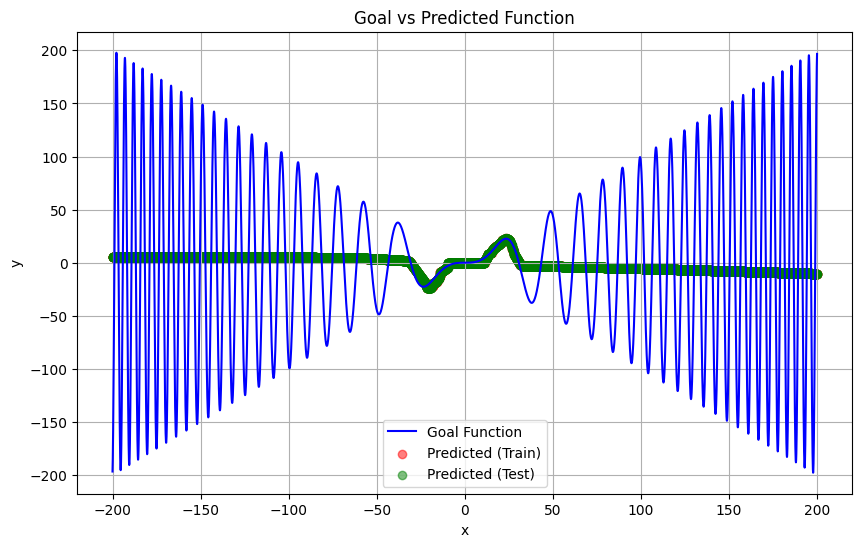

In [ ]:
# model 1
import matplotlib.pyplot as plt

#Evaluate model
train_loss, train_mae = model_1.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model_1.evaluate(x_test,y_test, verbose = 0)
print("Training Loss: ", train_loss)
print("Training MAE: ", train_mae)
print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

# Plot Predicted Results on the same plot as the Goal Function
plt.figure(figsize=(10,6))

# Plot Goal Function
plt.plot(x_values, y_values, label='Goal Function', color='blue')

# Plot predicted results
y_pred_train = model_1.predict(x_train)
y_pred_test = model_1.predict(x_test)
plt.scatter(x_train, y_pred_train, label='Predicted (Train)', color='red', alpha=0.5)
plt.scatter(x_test, y_pred_test, label='Predicted (Test)', color='green', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Goal vs Predicted Function')
plt.legend()
plt.grid(True)
plt.show()




Training Loss:  63.1031379699707
Training MAE:  63.1031379699707
Test Loss:  63.77339553833008
Test MAE:  63.77339553833008
188/188 [==============================] - 0s 2ms/step


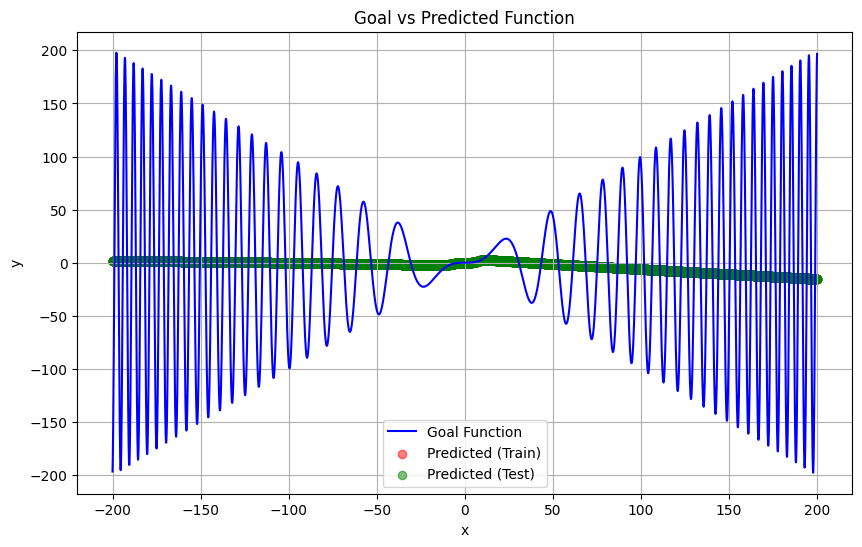

In [ ]:
# model 2
#Evaluate model
train_loss, train_mae = model_2.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model_2.evaluate(x_test,y_test, verbose = 0)
print("Training Loss: ", train_loss)
print("Training MAE: ", train_mae)
print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

# Plot Predicted Results on the same plot as the Goal Function
plt.figure(figsize=(10,6))

# Plot Goal Function
plt.plot(x_values, y_values, label='Goal Function', color='blue')

# Plot predicted results
y_pred_train = model_2.predict(x_train)
y_pred_test = model_2.predict(x_test)
plt.scatter(x_train, y_pred_train, label='Predicted (Train)', color='red', alpha=0.5)
plt.scatter(x_test, y_pred_test, label='Predicted (Test)', color='green', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Goal vs Predicted Function')
plt.legend()
plt.grid(True)
plt.show()

Training Loss:  62.72797393798828
Training MAE:  62.72797393798828
Test Loss:  63.341636657714844
Test MAE:  63.341636657714844
188/188 [==============================] - 0s 1ms/step


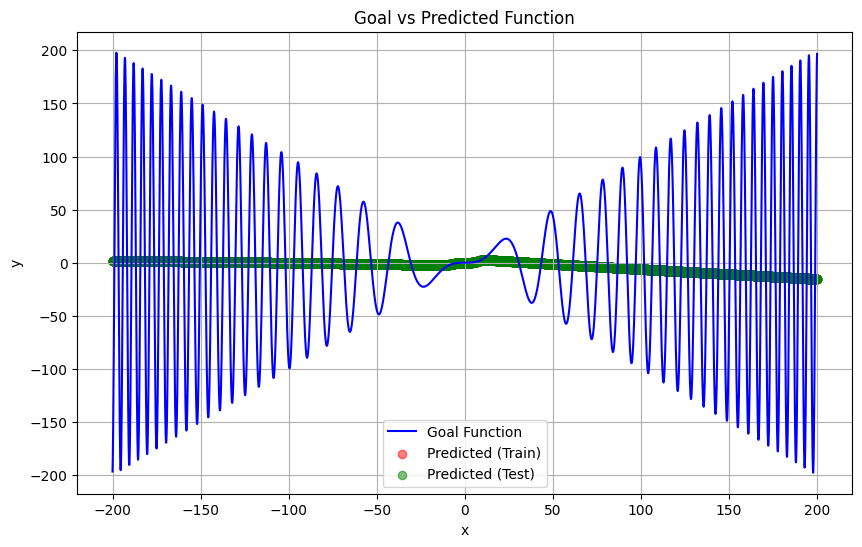

In [ ]:
# model 3
#Evaluate model
train_loss, train_mae = model_3.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model_3.evaluate(x_test,y_test, verbose = 0)
print("Training Loss: ", train_loss)
print("Training MAE: ", train_mae)
print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

# Plot Predicted Results on the same plot as the Goal Function
plt.figure(figsize=(10,6))

# Plot Goal Function
plt.plot(x_values, y_values, label='Goal Function', color='blue')

# Plot predicted results
y_pred_train = model_2.predict(x_train)
y_pred_test = model_2.predict(x_test)
plt.scatter(x_train, y_pred_train, label='Predicted (Train)', color='red', alpha=0.5)
plt.scatter(x_test, y_pred_test, label='Predicted (Test)', color='green', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Goal vs Predicted Function')
plt.legend()
plt.grid(True)
plt.show()

#### Part 4 get model output and feedforward by yourself

Recall how a Feedforward Neural Network gets its output. Now choose your model with highest accuracy, and call [get_weights()](https://keras.io/api/layers/base_layer/#get_weights-method) to get its weights and bias.
<br>
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the [model.predict()](https://keras.io/api/models/model_training_apis/#predict-method) result.
<br> They should be identical for the first several digitals, if not for all digits.
<br>
<br> If you do not know what are the necessary calculations, they are the steps mentioned in file Introduction_to_Artificial_Neural_Network.ipynb
<br> Matrix transpose can be done easily with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html) or [numpy](https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html). Activation functions can be applied with [keras' activation functions](https://keras.io/api/layers/activations/#available-activations).


In [ ]:
# Model 1 has the highest accuracy
# Get weights and bias
weights = model_1.get_weights()

# Extract weights and biases for each layer
layer_1_weights, layer_1_bias = weights[0], weights[1]
layer_2_weights, layer_2_bias = weights[2], weights[3]
layer_3_weights, layer_3_bias = weights[4], weights[5]
layer_4_weights, layer_4_bias = weights[6], weights[7]
layer_5_weights, layer_5_bias = weights[8], weights[9]
layer_6_weights, layer_6_bias = weights[10], weights[11]
output_layer_weights, output_layer_bias = weights[12], weights[13]

# Choose 5 data points
num_data_points = x_values.shape[0]
chosen = np.random.choice(num_data_points, size=5, replace=False)
chosen_data_points = x_values[chosen]

# Reshape chosen data points
chosen_data_points = chosen_data_points.reshape((-1, 1))

# Perform forward pass calculations manually using ReLU function
layer_1_output = np.dot(chosen_data_points, layer_1_weights) + layer_1_bias
layer_1_activation = np.maximum(layer_1_output, 0)

layer_2_output = np.dot(layer_1_activation, layer_2_weights) + layer_2_bias
layer_2_activation = np.maximum(layer_2_output, 0)

layer_3_output = np.dot(layer_2_activation, layer_3_weights) + layer_3_bias
layer_3_activation = np.maximum(layer_3_output, 0)

layer_4_output = np.dot(layer_3_activation, layer_4_weights) + layer_4_bias
layer_4_activation = np.maximum(layer_4_output, 0)

layer_5_output = np.dot(layer_4_activation, layer_5_weights.T) + layer_5_bias
layer_5_activation = np.maximum(layer_5_output, 0)

layer_6_output = np.dot(layer_5_activation, layer_6_weights) + layer_6_bias
layer_6_activation = np.maximum(layer_6_output, 0)

final_output = np.dot(layer_6_activation, output_layer_weights) + output_layer_bias

# Compare with the model.predict() result
model_predictions = model_1.predict(chosen_data_points)

# Print Comparison
for i in range(5):
  print("Data Point", i+1)
  print("Calculation: ", final_output[i])
  print("Model Prediction: ", model_predictions[i])
  print()


ValueError: operands could not be broadcast together with shapes (5,) (150,150) 

Kept getting ValueError                                Traceback (most recent call last)
<ipython-input-9-be5fcb7f964a> in <cell line: 35>()
     33 layer_4_activation = np.maximum(layer_4_output, 0)
     34
---> 35 layer_5_output = np.dot(layer_4_activation, layer_5_weights.T) + layer_5_bias
     36 layer_5_activation = np.maximum(layer_5_output, 0)
     37

ValueError: operands could not be broadcast together with shapes (5,) (150,150)

and could not figure out a fix for it. So I was not able to complete Part 4.